# CUSTOMER LOAN PREDICTION USING MACHINE LEARNING ALGORITHM

Here we are try to find out Machine learning model to predict whether assigning the loan to particular person will be safe or not.We are using the previous records of the people to whom the loan was granted before and on the basis of these records/experiences the machine was trained using the machine learning model (Logistic Regression model) which give the most accurate result. 

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing data
df = pd.read_csv('data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
print("no.of rows and columns:",df.shape)

no.of rows and columns: (614, 13)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Analysis of each columns

In [8]:
df['Gender'].value_counts(dropna=False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

In [9]:
# Here we can replace the null values with Male  

In [10]:
df['Gender']=df['Gender'].replace(np.nan,'Male')

<AxesSubplot:xlabel='Gender', ylabel='count'>

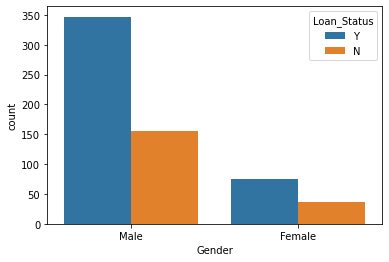

In [11]:
sns.countplot(x=df['Gender'],hue=df['Loan_Status'])

##### From this graph, we can infer that male applicants have a good chance for approval of loan

In [12]:
df['Married'].value_counts(dropna=False)

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

In [13]:
# here we replace the null values with Yes
df['Married']=df['Married'].replace(np.nan,'Yes')

<AxesSubplot:xlabel='Married', ylabel='count'>

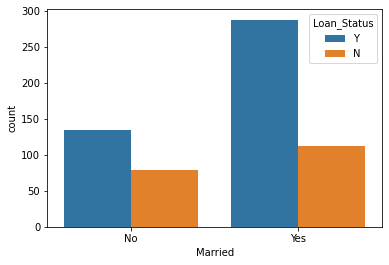

In [14]:
sns.countplot(x=df['Married'],hue=df['Loan_Status'])

##### As we can see married applicants have more chances for approval of the loan

In [15]:
df['Dependents'].value_counts(dropna=False)

0      345
1      102
2      101
3+      51
NaN     15
Name: Dependents, dtype: int64

In [16]:
df['Dependents']=df['Dependents'].replace(np.nan,'0')
df['Dependents']=df['Dependents'].replace('3+' , '3')

In [17]:
df['Dependents'].value_counts(dropna=False)

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

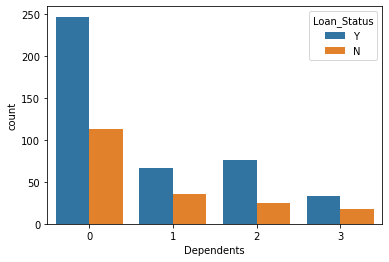

In [18]:
sns.countplot(x=df['Dependents'],hue=df['Loan_Status'])

##### We can see that dependents are zero(independent applicants), possibility of getting approval of the loan is more


In [19]:
df['Education'].value_counts(dropna=False)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

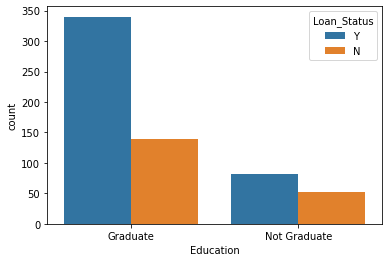

In [20]:
sns.countplot(x=df['Education'],hue=df['Loan_Status'])

##### The graduates have a higher chance of loan approval

In [21]:
df['Self_Employed'].value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

In [22]:
# here we can use backward fill for replacing null values
df['Self_Employed']=df['Self_Employed'].bfill()

In [23]:
df['Self_Employed'].value_counts(dropna=False)

No     528
Yes     86
Name: Self_Employed, dtype: int64

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

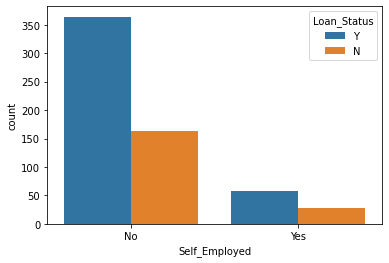

In [24]:
sns.countplot(x=df['Self_Employed'],hue=df['Loan_Status'])

##### Here we can infer that self-employed customers get a lower chance of loan approval

In [25]:
df['ApplicantIncome'].value_counts(dropna=False)

2500    9
6000    6
2600    6
4583    6
4166    5
       ..
5503    1
3450    1
2425    1
2423    1
4095    1
Name: ApplicantIncome, Length: 505, dtype: int64

<AxesSubplot:ylabel='ApplicantIncome'>

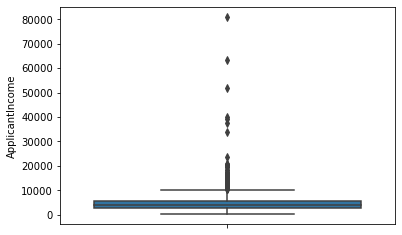

In [26]:
#visualizing spread of ApplicantIncome numeric variable
sns.boxplot(y=df['ApplicantIncome'])

In [27]:
#checking percentile values
df['ApplicantIncome'].describe(percentiles=(0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99))

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
1%        1025.000000
5%        1897.550000
10%       2216.100000
25%       2877.500000
50%       3812.500000
75%       5795.000000
90%       9459.900000
95%      14583.000000
99%      32540.410000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [28]:
#capping
# Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

In [29]:
Q1=df['ApplicantIncome'].quantile(0.01)
Q3=df['ApplicantIncome'].quantile(0.99)

In [30]:
df=df[df['ApplicantIncome']<=Q3]
df=df[df['ApplicantIncome']>=Q1]

In [31]:
df.shape

(601, 13)

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

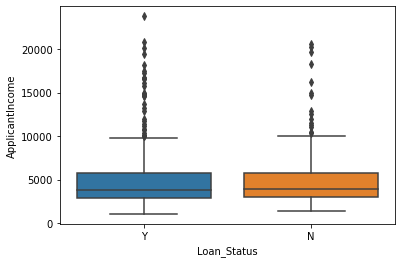

In [32]:
#checking Spread of "ApplicantIncome" vs Loan_Status variable
sns.boxplot(y=df['ApplicantIncome'],x=df['Loan_Status'])

##### As the medians are same for both the categories we cannot infer anything from this column.

<AxesSubplot:ylabel='CoapplicantIncome'>

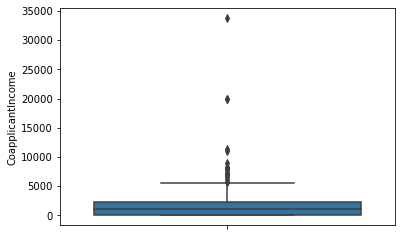

In [33]:
#visualizing spread of CoapplicantIncome numeric variable
sns.boxplot(y=df['CoapplicantIncome'])

In [34]:
#checking percentiles for "CoapplicantIncome"
df['CoapplicantIncome'].describe(percentiles=(0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99))

count      601.000000
mean      1551.264426
std       2447.952413
min          0.000000
1%           0.000000
5%           0.000000
10%          0.000000
25%          0.000000
50%       1167.000000
75%       2254.000000
90%       3750.000000
95%       4983.000000
99%       8333.000000
max      33837.000000
Name: CoapplicantIncome, dtype: float64

In [35]:
#Outlier Treatment: Remove top & bottom 1% 
Q1=df['CoapplicantIncome'].quantile(0.01)
Q3=df['CoapplicantIncome'].quantile(0.99)
df=df[df['CoapplicantIncome']<=Q3]
df=df[df['CoapplicantIncome']>=Q1]

In [36]:
df.shape

(595, 13)

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

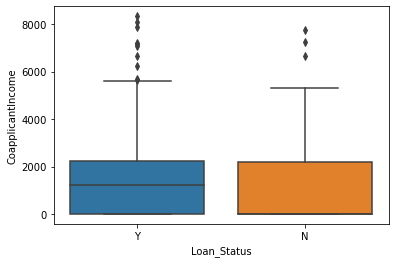

In [37]:
#checking Spread of "CoapplicantIncome" vs Loan_Status variable
sns.boxplot(y=df['CoapplicantIncome'],x=df['Loan_Status'])

In [38]:
#visualizing spread of LoanAmount numeric variable

<AxesSubplot:ylabel='LoanAmount'>

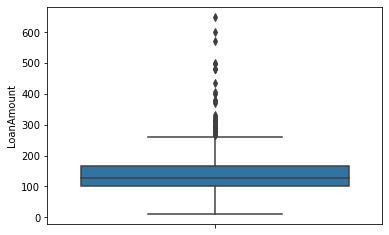

In [39]:
 sns.boxplot(y=df['LoanAmount'])

In [40]:
df['LoanAmount'].isnull().sum()

22

In [41]:
#checking percentiles for "LoanAmount"
df['LoanAmount'].describe(percentiles=(0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99))

count    573.000000
mean     142.420593
std       77.182008
min        9.000000
1%        30.000000
5%        55.600000
10%       71.000000
25%      100.000000
50%      127.000000
75%      165.000000
90%      217.600000
95%      276.600000
99%      480.000000
max      650.000000
Name: LoanAmount, dtype: float64

In [42]:
#Outlier Treatment: Remove top & bottom 1% 
Q1=df['LoanAmount'].quantile(0.01)
Q3=df['LoanAmount'].quantile(0.99)
df=df[df['LoanAmount']<=Q3]
df=df[df['LoanAmount']>=Q1]

In [43]:
df.shape

(563, 13)

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

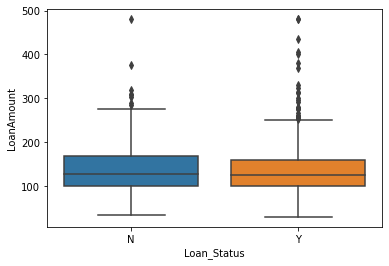

In [44]:
#checking Spread of "LoanAmount " vs Loan_Status variable
sns.boxplot(y=df['LoanAmount'],x=df['Loan_Status'])

In [45]:
df['Loan_Amount_Term'].value_counts(dropna=False)

360.0    473
180.0     39
NaN       14
480.0     13
300.0     12
84.0       4
240.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [46]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].bfill()

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

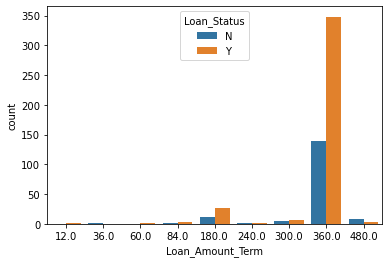

In [47]:
sns.countplot(x=df['Loan_Amount_Term'],hue=df['Loan_Status'])

In [48]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [49]:
df['Credit_History'].value_counts(dropna=False,normalize=True)

1.0    0.772647
0.0    0.143872
NaN    0.083481
Name: Credit_History, dtype: float64

In [50]:
df['Credit_History']=df['Credit_History'].bfill()

In [51]:
df['Credit_History'].value_counts(dropna=False,normalize=True)

1.0    0.841918
0.0    0.158082
Name: Credit_History, dtype: float64

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

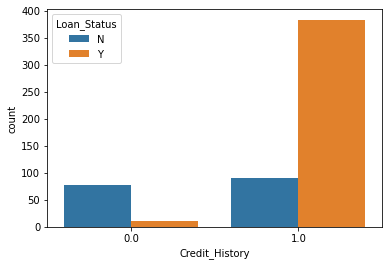

In [52]:
sns.countplot(x=df['Credit_History'],hue=df['Loan_Status'])

##### Here  we can see that credit history having a score of 1 will get more chance of approval

In [53]:
df['Property_Area'].value_counts(dropna=False,normalize=True)

Semiurban    0.380107
Urban        0.321492
Rural        0.298401
Name: Property_Area, dtype: float64

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

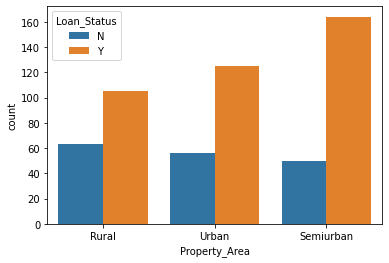

In [54]:
sns.countplot(x=df['Property_Area'],hue=df['Loan_Status'])

##### Here we can infer that semiurban customers get a higher chance of loan approval


In [55]:
df['LoanAmount'].value_counts(dropna=False,normalize=True)

120.0    0.033748
110.0    0.028419
100.0    0.026643
187.0    0.021314
160.0    0.021314
           ...   
405.0    0.001776
376.0    0.001776
211.0    0.001776
250.0    0.001776
436.0    0.001776
Name: LoanAmount, Length: 187, dtype: float64

<AxesSubplot:>

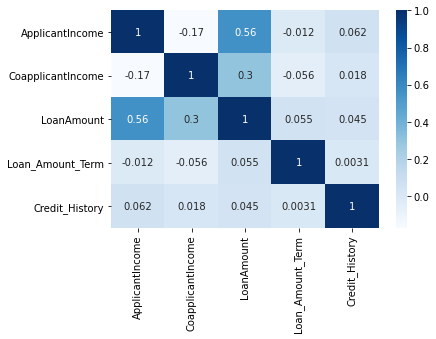

In [56]:
#Visualization of correlation using Heat map
sns.heatmap(df.corr(),annot=True,cmap='Blues')

# Dummy Creation

In [57]:
# List of  categorical columns
df.select_dtypes(include=object).columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [58]:
dummy=pd.get_dummies(df['Property_Area'],prefix='Property_Area')
dummy

,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,0,1
...,...,...,...
609,1,0,0
610,1,0,0
611,0,0,1
612,0,0,1


In [59]:
df=pd.concat([df,dummy],1)
df=df.drop('Property_Area',1)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,N,1,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y,0,0,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y,0,0,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Y,0,0,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Y,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Y,1,0,0
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Y,1,0,0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Y,0,0,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Y,0,0,1


In [60]:
dummy1=pd.get_dummies(df['Gender'],prefix='gender')
df=pd.concat([df,dummy1],1)
dummy2=pd.get_dummies(df['Education'],prefix='Education')
df=pd.concat([df,dummy2],1)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,gender_Female,gender_Male,Education_Graduate,Education_Not Graduate
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,N,1,0,0,0,1,1,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y,0,0,1,0,1,1,0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y,0,0,1,0,1,0,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Y,0,0,1,0,1,1,0
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Y,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Y,1,0,0,1,0,1,0
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Y,1,0,0,0,1,1,0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Y,0,0,1,0,1,1,0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Y,0,0,1,0,1,1,0


In [61]:
#dropping the original columns after dummy variable creation
d_col=['Gender','Education','Loan_ID']
df.drop(d_col,axis=1,inplace=True)

In [62]:
v =  ['Loan_Status']

# Defining the map function
def binary_map(x):
    return x.map({'Y': 1, "N": 0})

# Applying the function to the housing list
df[v] = df[v].apply(binary_map)

In [63]:
varlist =  ['Married','Self_Employed']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [64]:
df

,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,gender_Female,gender_Male,Education_Graduate,Education_Not Graduate
1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,1,0,0,0,1,1,0
2,1,0,1,3000,0.0,66.0,360.0,1.0,1,0,0,1,0,1,1,0
3,1,0,0,2583,2358.0,120.0,360.0,1.0,1,0,0,1,0,1,0,1
4,0,0,0,6000,0.0,141.0,360.0,1.0,1,0,0,1,0,1,1,0
5,1,2,1,5417,4196.0,267.0,360.0,1.0,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,2900,0.0,71.0,360.0,1.0,1,1,0,0,1,0,1,0
610,1,3,0,4106,0.0,40.0,180.0,1.0,1,1,0,0,0,1,1,0
611,1,1,0,8072,240.0,253.0,360.0,1.0,1,0,0,1,0,1,1,0
612,1,2,0,7583,0.0,187.0,360.0,1.0,1,0,0,1,0,1,1,0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 563 entries, 1 to 613
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Married                  563 non-null    int64  
 1   Dependents               563 non-null    object 
 2   Self_Employed            563 non-null    int64  
 3   ApplicantIncome          563 non-null    int64  
 4   CoapplicantIncome        563 non-null    float64
 5   LoanAmount               563 non-null    float64
 6   Loan_Amount_Term         563 non-null    float64
 7   Credit_History           563 non-null    float64
 8   Loan_Status              563 non-null    int64  
 9   Property_Area_Rural      563 non-null    uint8  
 10  Property_Area_Semiurban  563 non-null    uint8  
 11  Property_Area_Urban      563 non-null    uint8  
 12  gender_Female            563 non-null    uint8  
 13  gender_Male              563 non-null    uint8  
 14  Education_Graduate       5

In [66]:
df['Dependents']=pd.to_numeric(df['Dependents'])
df['Credit_History']=pd.to_numeric(df['Credit_History'])

# Train-Test-Split

In [67]:
from sklearn.model_selection import train_test_split

y = df['Loan_Status']
X = df.drop('Loan_Status',axis=1)

In [68]:
# Splitting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.7,random_state=50)

In [69]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 34 to 521
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Married                  394 non-null    int64  
 1   Dependents               394 non-null    int64  
 2   Self_Employed            394 non-null    int64  
 3   ApplicantIncome          394 non-null    int64  
 4   CoapplicantIncome        394 non-null    float64
 5   LoanAmount               394 non-null    float64
 6   Loan_Amount_Term         394 non-null    float64
 7   Credit_History           394 non-null    float64
 8   Property_Area_Rural      394 non-null    uint8  
 9   Property_Area_Semiurban  394 non-null    uint8  
 10  Property_Area_Urban      394 non-null    uint8  
 11  gender_Female            394 non-null    uint8  
 12  gender_Male              394 non-null    uint8  
 13  Education_Graduate       394 non-null    uint8  
 14  Education_Not Graduate   

### Feature scaling

In [70]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()


In [71]:
num_cols =X_train.select_dtypes(include=['float64', 'int64']).columns
num_cols

Index(['Married', 'Dependents', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History'],
      dtype='object')

In [72]:
X_train[num_cols] = Scaler.fit_transform(X_train[num_cols])
X_train

,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,gender_Female,gender_Male,Education_Graduate,Education_Not Graduate
34,-1.416910,2.208703,-0.402793,2.432051,0.918465,2.808206,0.311149,0.444487,1,0,0,0,1,1,0
390,-1.416910,2.208703,-0.402793,1.369937,-0.863334,0.695737,0.311149,0.444487,1,0,0,0,1,1,0
457,0.705761,-0.761362,-0.402793,-0.369661,0.662480,0.507962,0.311149,0.444487,0,0,1,0,1,1,0
295,0.705761,2.208703,-0.402793,-0.144045,-0.120918,-0.477857,0.311149,0.444487,0,0,1,0,1,1,0
482,0.705761,-0.761362,-0.402793,-0.887493,1.007555,-0.196195,0.311149,0.444487,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,-1.416910,-0.761362,-0.402793,-0.356277,-0.863334,-0.430914,2.188527,0.444487,0,0,1,0,1,1,0
148,-1.416910,-0.761362,-0.402793,1.635386,0.126158,1.321653,0.311149,0.444487,1,0,0,1,0,1,0
315,0.705761,0.228660,-0.402793,-0.468128,0.110716,-0.462209,-2.504917,0.444487,0,0,1,0,1,0,1
121,-1.416910,-0.761362,-0.402793,-0.223712,-0.863334,-1.510620,0.311149,0.444487,0,1,0,1,0,1,0


In [73]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 34 to 521
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Married                  394 non-null    float64
 1   Dependents               394 non-null    float64
 2   Self_Employed            394 non-null    float64
 3   ApplicantIncome          394 non-null    float64
 4   CoapplicantIncome        394 non-null    float64
 5   LoanAmount               394 non-null    float64
 6   Loan_Amount_Term         394 non-null    float64
 7   Credit_History           394 non-null    float64
 8   Property_Area_Rural      394 non-null    uint8  
 9   Property_Area_Semiurban  394 non-null    uint8  
 10  Property_Area_Urban      394 non-null    uint8  
 11  gender_Female            394 non-null    uint8  
 12  gender_Male              394 non-null    uint8  
 13  Education_Graduate       394 non-null    uint8  
 14  Education_Not Graduate   

In [74]:
X_train.isnull().sum()

Married                    0
Dependents                 0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
gender_Female              0
gender_Male                0
Education_Graduate         0
Education_Not Graduate     0
dtype: int64

In [75]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression()


In [76]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,15)             # running RFE with 15 variables as output15
rfe = rfe.fit(X_train,y_train)

In [77]:
col = X_train.columns[rfe.support_]
col

Index(['Married', 'Dependents', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'gender_Female', 'gender_Male', 'Education_Graduate',
       'Education_Not Graduate'],
      dtype='object')

In [78]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            Loan_Status   No. Observations:                  394
Model:                            GLM   Df Residuals:                      381
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -180.60
Date:                Sat, 23 Apr 2022   Deviance:                       361.20
Time:                        10:30:46   Pearson chi2:                     395.
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.3987      0.089      4.457      0.000       0.223       0.574
Married                     0.2617      0.154      1.696      0.090      -0.041       0.564
Dependents                  0.0565      0.150      0.376      0.707      -0.238       0.351
Self_Employed              -0.0494      0.142     -0.349      0.727      -0.327       0.228
ApplicantIncome             0.1215      0.198      0.613      0.540      -0.267       0.510
CoapplicantIncome           0.0668      0.168      0.397      0.691      -0.263       0.396
LoanAmount                 -0.1924      0.192     -1.002      0.316      -0.569       0.184
Loan_Amount_Term            0.0200      0.140      0.143      0.886      -0.254       0.294
Credit_History              1.2376      0.141      8.759      0.000       0.961       1.514
Property_Area_Rural        -0.1257      0.192     -0.654      0.513      -0.502       0.251
Property_Area_Semiurban     0.5161      0.196      2.628      0.009       0.131       0.901
Property_Area_Urban         0.0083      0.202      0.041      0.967      -0.388       0.405
gender_Female               0.2332      0.225      1.034      0.301      -0.209       0.675
gender_Male                 0.1655      0.169      0.979      0.328      -0.166       0.497
Education_Graduate          0.2294      0.150      1.530      0.126      -0.064       0.523
Education_Not Graduate      0.1693      0.189      0.897      0.370      -0.200       0.539
===========================================================================================
"""

In [79]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [80]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Property_Area_Rural,inf
9,Property_Area_Semiurban,inf
10,Property_Area_Urban,inf
11,gender_Female,inf
12,gender_Male,inf
13,Education_Graduate,inf
14,Education_Not Graduate,inf
5,LoanAmount,1.93
3,ApplicantIncome,1.91
4,CoapplicantIncome,1.49


In [81]:
col=col.drop('Property_Area_Rural',1)

In [82]:
#BUILDING MODEL #2
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            Loan_Status   No. Observations:                  394
Model:                            GLM   Df Residuals:                      381
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -180.60
Date:                Sat, 23 Apr 2022   Deviance:                       361.20
Time:                        10:30:46   Pearson chi2:                     396.
No. Iterations:                    85                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.3371      0.135      2.503      0.012       0.073       0.601
Married                     0.2617      0.151      1.728      0.084      -0.035       0.558
Dependents                  0.0572      0.147      0.388      0.698      -0.232       0.346
Self_Employed              -0.0506      0.141     -0.360      0.719      -0.326       0.225
ApplicantIncome             0.1236      0.192      0.645      0.519      -0.252       0.499
CoapplicantIncome           0.0673      0.165      0.409      0.682      -0.255       0.390
LoanAmount                 -0.1932      0.187     -1.034      0.301      -0.559       0.173
Loan_Amount_Term            0.0202      0.137      0.147      0.883      -0.249       0.290
Credit_History              1.2422      0.147      8.440      0.000       0.954       1.531
Property_Area_Semiurban     0.6412      0.327      1.960      0.050       0.000       1.282
Property_Area_Urban         0.1334      0.330      0.404      0.686      -0.514       0.781
gender_Female               0.2027      0.232      0.873      0.383      -0.252       0.658
gender_Male                 0.1344      0.168      0.800      0.424      -0.195       0.464
Education_Graduate          0.1982      0.159      1.248      0.212      -0.113       0.510
Education_Not Graduate      0.1389      0.190      0.729      0.466      -0.234       0.512
===========================================================================================
"""

In [83]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,gender_Female,inf
11,gender_Male,inf
12,Education_Graduate,inf
13,Education_Not Graduate,inf
5,LoanAmount,1.93
3,ApplicantIncome,1.91
4,CoapplicantIncome,1.49
8,Property_Area_Semiurban,1.41
9,Property_Area_Urban,1.41
0,Married,1.34


In [84]:
#BUILDING MODEL #3
col=col.drop('gender_Female',1)

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            Loan_Status   No. Observations:                  394
Model:                            GLM   Df Residuals:                      381
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -180.60
Date:                Sat, 23 Apr 2022   Deviance:                       361.20
Time:                        10:30:46   Pearson chi2:                     396.
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.4722      0.267      1.769      0.077      -0.051       0.995
Married                     0.2617      0.151      1.728      0.084      -0.035       0.558
Dependents                  0.0572      0.147      0.388      0.698      -0.232       0.346
Self_Employed              -0.0506      0.141     -0.360      0.719      -0.326       0.225
ApplicantIncome             0.1236      0.192      0.645      0.519      -0.252       0.499
CoapplicantIncome           0.0673      0.165      0.409      0.682      -0.255       0.390
LoanAmount                 -0.1932      0.187     -1.034      0.301      -0.559       0.173
Loan_Amount_Term            0.0202      0.137      0.147      0.883      -0.249       0.290
Credit_History              1.2422      0.147      8.440      0.000       0.954       1.531
Property_Area_Semiurban     0.6412      0.327      1.960      0.050       0.000       1.282
Property_Area_Urban         0.1334      0.330      0.404      0.686      -0.514       0.781
gender_Male                -0.0682      0.382     -0.179      0.858      -0.817       0.681
Education_Graduate          0.2658      0.188      1.415      0.157      -0.102       0.634
Education_Not Graduate      0.2064      0.230      0.898      0.369      -0.244       0.657
===========================================================================================
"""

In [85]:

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Education_Graduate,7.36
12,Education_Not Graduate,3.08
5,LoanAmount,1.93
3,ApplicantIncome,1.91
4,CoapplicantIncome,1.49
8,Property_Area_Semiurban,1.41
9,Property_Area_Urban,1.41
0,Married,1.34
10,gender_Male,1.24
1,Dependents,1.20


In [86]:
#BUILDING MODEL #3
col=col.drop('Education_Graduate',1)

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            Loan_Status   No. Observations:                  394
Model:                            GLM   Df Residuals:                      381
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -180.60
Date:                Sat, 23 Apr 2022   Deviance:                       361.20
Time:                        10:30:47   Pearson chi2:                     396.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.7380      0.400      1.844      0.065      -0.047       1.523
Married                     0.2617      0.151      1.728      0.084      -0.035       0.558
Dependents                  0.0572      0.147      0.388      0.698      -0.232       0.346
Self_Employed              -0.0506      0.141     -0.360      0.719      -0.326       0.225
ApplicantIncome             0.1236      0.192      0.645      0.519      -0.252       0.499
CoapplicantIncome           0.0673      0.165      0.409      0.682      -0.255       0.390
LoanAmount                 -0.1932      0.187     -1.034      0.301      -0.559       0.173
Loan_Amount_Term            0.0202      0.137      0.147      0.883      -0.249       0.290
Credit_History              1.2422      0.147      8.440      0.000       0.954       1.531
Property_Area_Semiurban     0.6412      0.327      1.960      0.050       0.000       1.282
Property_Area_Urban         0.1334      0.330      0.404      0.686      -0.514       0.781
gender_Male                -0.0682      0.382     -0.179      0.858      -0.817       0.681
Education_Not Graduate     -0.0593      0.324     -0.183      0.855      -0.694       0.575
===========================================================================================
"""

In [87]:


vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,gender_Male,2.75
5,LoanAmount,1.93
3,ApplicantIncome,1.91
8,Property_Area_Semiurban,1.70
9,Property_Area_Urban,1.69
4,CoapplicantIncome,1.48
11,Education_Not Graduate,1.38
0,Married,1.25
1,Dependents,1.19
2,Self_Employed,1.12


In [88]:
y_train_pred=res.predict(X_train_sm)
y_train_pred[:10]

34     0.695057
390    0.727285
457    0.805940
295    0.853134
482    0.883600
552    0.823216
329    0.751549
3      0.813366
497    0.824725
389    0.802651
dtype: float64

In [89]:
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.69505722, 0.7272854 , 0.80593984, 0.853134  , 0.88359987,
       0.82321638, 0.75154945, 0.81336584, 0.82472469, 0.80265075])

In [90]:
y_train_pred[:10]

array([0.69505722, 0.7272854 , 0.80593984, 0.853134  , 0.88359987,
       0.82321638, 0.75154945, 0.81336584, 0.82472469, 0.80265075])

In [91]:
y_train_pred_final=pd.DataFrame({'Status':y_train.values,'Status_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final

,Status,Status_prob,Prospect ID
0,0,0.695057,34
1,1,0.727285,390
2,0,0.805940,457
3,1,0.853134,295
4,1,0.883600,482
...,...,...,...
389,0,0.728456,75
390,0,0.702170,148
391,1,0.817917,315
392,1,0.851934,121


In [92]:
y_train_pred_final['Predicted'] = y_train_pred_final.Status_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head(25)

,Status,Status_prob,Prospect ID,Predicted
0,0,0.695057,34,1
1,1,0.727285,390,1
2,0,0.805940,457,1
3,1,0.853134,295,1
4,1,0.883600,482,1
5,1,0.823216,552,1
6,1,0.751549,329,1
7,1,0.813366,3,1
8,1,0.824725,497,1
9,1,0.802651,389,1


In [93]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Status, y_train_pred_final.Predicted )
print(confusion)

[[ 56  62]
 [  9 267]]


In [94]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Status, y_train_pred_final.Predicted))

0.8197969543147208


In [95]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [96]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.967391304347826

In [97]:
# Let us calculate specificity
TN / float(TN+FP)

0.4745762711864407

In [98]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.5254237288135594


In [99]:
# positive predictive value 
print (TP / float(TP+FP))

0.8115501519756839


In [100]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8615384615384616


# Prediction on Test

In [101]:
num_cols=X_test.select_dtypes(include=['float64','int64']).columns
num_cols

Index(['Married', 'Dependents', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History'],
      dtype='object')

In [102]:
X_test[num_cols]=Scaler.transform(X_test[num_cols])

In [103]:
X_test=X_test[col]

In [104]:
X_test

,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Semiurban,Property_Area_Urban,gender_Male,Education_Not Graduate
240,0.705761,1.218681,-0.402793,0.303043,2.106331,-0.321378,0.311149,0.444487,0,0,1,0
123,0.705761,1.218681,-0.402793,-0.608979,-0.863334,-0.931647,0.311149,0.444487,1,0,1,0
310,-1.416910,-0.761362,-0.402793,-0.621725,-0.863334,-0.884703,0.311149,0.444487,1,0,0,0
227,0.705761,1.218681,-0.402793,0.440388,0.143382,1.086935,0.311149,0.444487,1,0,1,0
502,0.705761,1.218681,-0.402793,-0.000964,2.476946,1.055639,0.311149,0.444487,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
23,0.705761,1.218681,-0.402793,-0.478963,0.275236,-0.446561,0.311149,-2.249786,0,0,1,1
110,-1.416910,-0.761362,-0.402793,0.142754,-0.863334,-0.071011,0.311149,0.444487,0,1,1,0
530,0.705761,-0.761362,-0.402793,-1.224641,2.403298,1.180822,0.311149,0.444487,0,0,1,0
406,0.705761,-0.761362,-0.402793,-0.860725,0.562105,-0.399618,0.311149,0.444487,0,1,1,1


In [105]:
X_test_sm=sm.add_constant(X_test)

In [106]:
y_test_pred=res.predict(X_test_sm)
y_test_pred.head()

240    0.851226
123    0.899425
310    0.829168
227    0.880611
502    0.891563
dtype: float64

In [107]:
y_test_pred=y_test_pred.values.reshape(-1)

In [108]:
# Converting y_pred to a dataframe which is an array
y_pred_final = pd.DataFrame({'Status':y_test.values,'Status_prob':y_test_pred})
y_pred_final['Prospect ID'] = y_test.index

In [109]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Status,Status_prob,Prospect ID
0,1,0.851226,240
1,1,0.899425,123
2,1,0.829168,310
3,1,0.880611,227
4,1,0.891563,502


In [110]:
y_pred_final['final_predicted'] = y_pred_final.Status_prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Status,Status_prob,Prospect ID,final_predicted
0,1,0.851226,240,1
1,1,0.899425,123,1
2,1,0.829168,310,1
3,1,0.880611,227,1
4,1,0.891563,502,1


In [111]:
metrics.accuracy_score(y_pred_final.Status, y_pred_final.final_predicted)

0.8165680473372781

In [112]:
confusion2 = metrics.confusion_matrix(y_pred_final.Status, y_pred_final.final_predicted )
confusion2

array([[ 22,  29],
       [  2, 116]], dtype=int64)

In [113]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [114]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9830508474576272

In [115]:
# Let us calculate specificity
TN / float(TN+FP)

0.43137254901960786

In [116]:
metrics.precision_score(y_pred_final.Status , y_pred_final.final_predicted)

0.8

In [117]:
metrics.recall_score(y_pred_final.Status, y_pred_final.final_predicted)

0.9830508474576272

### Comparing model accuracy on test set and train test 

### We find that two are nearly equal
For train set  overall accuracy :81.97
For test set overall accuracy   :81.65